In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("abalone_csv.xlsx")

In [3]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#De dataset die ik gekozen heb is een dataset van de UCA. Ik heb deze dataset op hun website gevonden en het zag er heel 
#intressant uit daarom dat ik het heb gekozen. 

#De dataset is zo verdeeld dat we in de eerste kollom een categorisch gegeven hebben nl. 'Sex', hier hebben we de waarden 
#M, F en I (Male, Female en Infant). In de kollom 'Length' zien we de lengte van de zeeoren die zijn onderzocht in mm. 
#In de kollom diameter zien we de diameter (in mm). De kollomen 'Whole_weight' en 'Shucked_weight' geven de info over 
#het gewicht van de zeeoren het hele gewicht is met de schelp, shucked is zonder schelp. 'Viscera_weight' is het gewicht nadat 
#al het vocht uit het lichaam is gehaald. 'Shell_weight' is het gewicht van de schelp en de laatste kollom toont ons het
#aantal ringen. 

In [5]:
#De bedoeling van deze dataset is eigelijk om Machine Learning toe te passen om de leeftijd van een zeeoor te bepalen op 
#basis van de gegeven kenmerken. Maar ik vond het veel intressanter om het geslacht te bepalen op basis van de gegeven 
#kenmerken en daarom dat ik hiernaar toe ga werken. 

In [6]:
#Ik ga eerst beginnen met elke kollom te analyseren en alles te noteren dat mij opvalt. Ik ga van links naar rechts werken. 

In [7]:
#Analyse 'Sex': 
df.Sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object

In [8]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
#Hier zien we dat deze kollom drie unieke waarden bevat. Waarvan de top waarde M ('Male') is. 
#In het tweede deel zien we dan de exacte cijfers per groep. We zien dat 'M' het hoogste staat, gevolgd door 'I' (Infant) en 
#als laatste 'F' (Female). 

Text(0.5, 0, 'Sex')

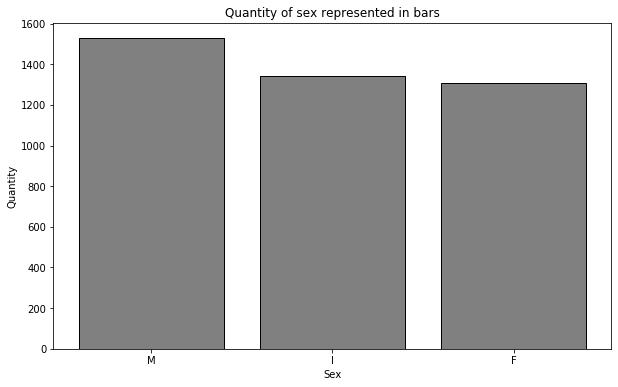

In [10]:
df_sex = df.Sex.value_counts()
x = range(len(df_sex))
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(111)
axes.bar(x, df_sex, color="grey", edgecolor="black")
axes.set_xticks(x)
axes.set_xticklabels(df_sex.axes[0])
axes.set_title("Quantity of sex represented in bars")
axes.set_ylabel("Quantity")
axes.set_xlabel("Sex")

In [11]:
#In bovenstaand staafdiagram zien we duidelijk dat de waarde 'M' hoger staat dan de andere twee. We zien ook dat 'I' een 
#klein beetje hoger staat dan 'F'. 

Text(0.5, 0, 'Sex')

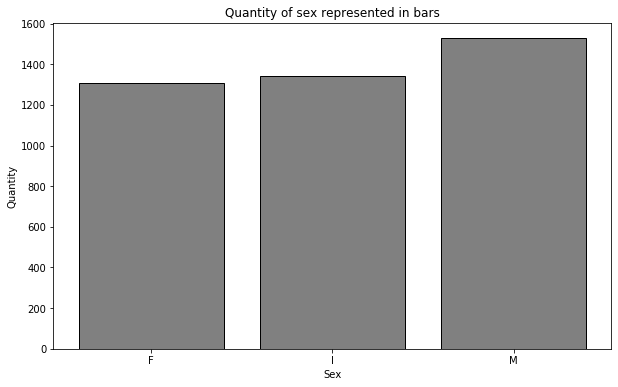

In [12]:
df_sex = df.Sex.value_counts().sort_index()
x = range(len(df_sex))
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(111)
axes.bar(x, df_sex, color="grey", edgecolor="black")
axes.set_xticks(x)
axes.set_xticklabels(df_sex.axes[0])
axes.set_title("Quantity of sex represented in bars")
axes.set_ylabel("Quantity")
axes.set_xlabel("Sex")

In [13]:
#Bovenstaand staafdiagram is hetzelde als de vorige, alleen is het dit keer van klein naar groot. 

In [14]:
#Analyse 'Lenght': 
df.Length.describe()

count    4177.000000
mean        0.523992
std         0.120093
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

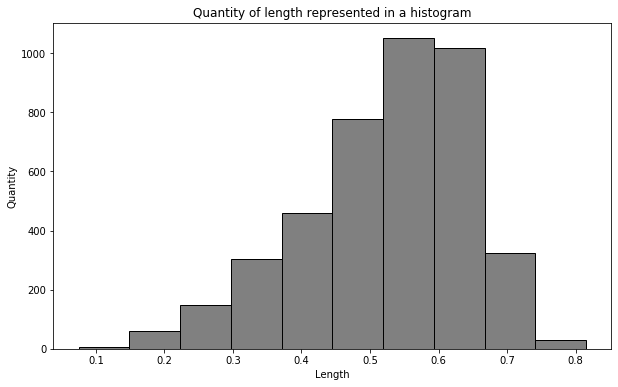

In [15]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Length, color='grey', edgecolor='black')

axes.set_title("Quantity of length represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Length")
plt.show()

In [16]:
#Op bovenstaand staafdiagram zien we het aantal zeeoren en hun lengte. We zien dat de drie hoogste staven zich bevinden tussen
#de 0.45mm en 0.70mm. We kunnen ook besluiten dat het minimum rond de 0.07mm zit en dat het maximum wat hoger staat dan 0.8mm. 
#(De exacte cijfers kunnen we hierboven bij de description bekijken).

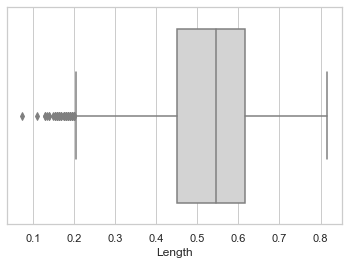

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Length, color="lightgrey")

In [18]:
#Bovenstaand boxplot laat ons de gegevens van 'Length' zien. In het boxplot zien we duidelijk dat de meerderheid zich 
#bevindt tussen de 0.45mm en de 0.62mm. Verder kunnen we ook besluiten dat het grootste deel zich aan de linkerkant van de 
#mediaan te zien is. We zien dat het minimum 0.20mm is en dat het maximum 0.81mm is. We zien ook dat er enkele uitschieters 
#zijn die onder het minimum zitten. We zien geen uitschieters die boven het maximum zitten. 

In [19]:
#Analyse 'Diameter': 
df.Diameter.describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

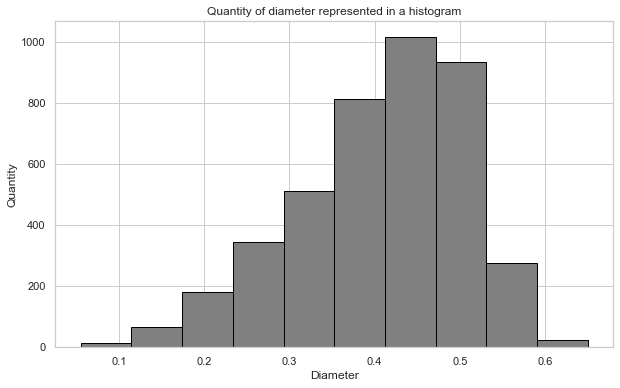

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Diameter, color='grey', edgecolor='black')

axes.set_title("Quantity of diameter represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Diameter")
plt.show()

In [21]:
#Op bovenstaand histogram zien we het aantal zeeoren met hun diameter. We merken op dat de vorm van deze grafiek fel op die 
#van de vorige grafiek lijkt (histogram 'Length'). Dit komt omdat de cijfers kort op elkaar liggen. We zien dat de drie 
#hoogste staven tussen de 0.35mm en de 0.55mm zitten. Het minimum staat ongeveer op 0.05mm en het maximum is 0.65mm. 

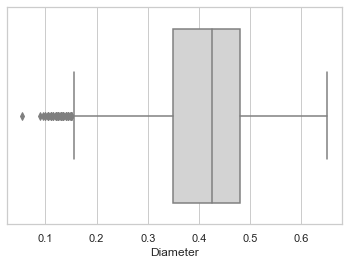

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Diameter, color="lightgrey")

In [23]:
#In het boxplot hierboven zien we dat het mediaan van 'Diameter' ongeveer 0.41mm is. We zien dat het grootste deel zich
#aan de linkerkant van de mediaan bevind. De minimumwaarde die we kunnen aflezen is ongeveer 0.15mm met enkele uitschieters 
#die hieronder zitten. De maximumwaarde die we zien is 0.65mm, we zien geen uitschieters die hier boven zitten. 

In [24]:
#Analyse 'Height': 
df.Height.describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

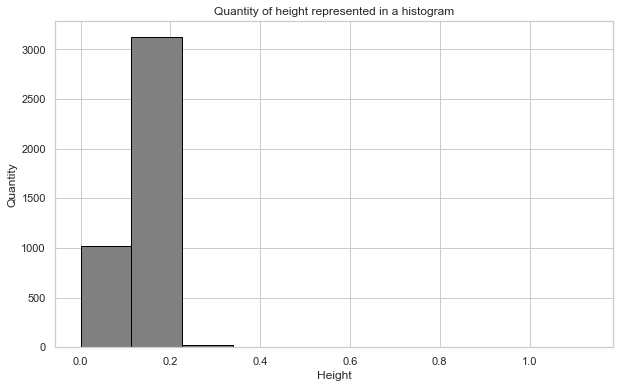

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Height, color='grey', edgecolor='black')

axes.set_title("Quantity of height represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Height")
plt.show()

In [26]:
#Dit histogram toont ons het aantal zeeoren en hun hoogte. We zien niet zoveel staven en we zien duidelijk dat er één staaf is
#die veel hoger staat. We kunnen besluiten dat alle zeeoren tussen de 0.00mm en de 0.40mm zitten, we zien ook 
#dat het grootste deel zeeoren zich bevindt tussen de 0.10mm en de 0.20mm. 

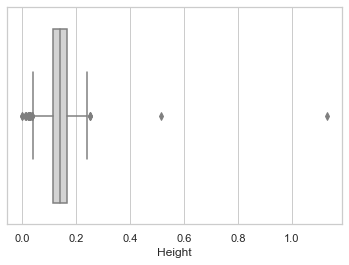

In [27]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Height, color="lightgrey")

In [28]:
print("Hoogste waarde bij 'Height':", df.Height.max())

Hoogste waarde bij 'Height': 1.13


In [29]:
#Bovenstaand boxplot geeft ons een beter beeld over de hoogte van de zeeoren. We zien dat de mediaan ongeveer 0.15mm is. Het 
#minimum staat op 0.05mm maar we zien uitschieters die hieronder zitten. Het maximum dat we zien is ongeveer 0.22mm, we zien 
#dit keer ook uitschieters die boven het maximum zitten. We merken dat er één uitschieter is die ver boven het maximum zit met 
#een lengte van 1.13mm. 

In [30]:
#De volgende analyses gaan over het gewicht gaan, om het duidelijk te houden wil ik eerst alles uitleggen: 

#Whole_weight = Shucked_weight + Viscera_weight + Shell_weight + 'Water en bloed' (deze zijn niet meegenomen in onze gegevens).
#Shucked_weight = Dit is het gewicht van het lichaam zonder de schelp. 
#Viscera_weight = Dit is het 'Shucked_weight' maar dan ook zonder vloeistof in het lichaam (dus geen water en geen bloed).
#Shell_weight = Het gewicht van de schelp. 

In [31]:
#Analyse 'Whole_weight': 
df.Whole_weight.describe()

count    4177.000000
mean        0.828742
std         0.490389
min         0.002000
25%         0.441500
50%         0.799500
75%         1.153000
max         2.825500
Name: Whole_weight, dtype: float64

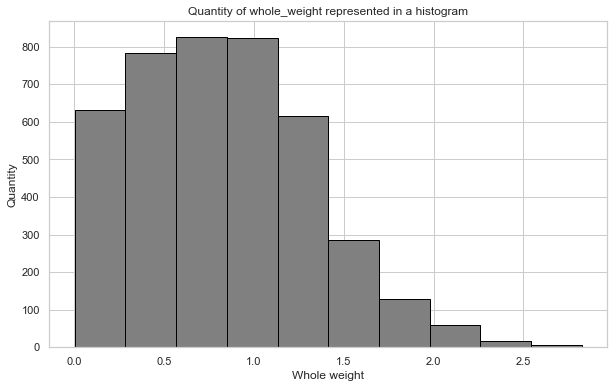

In [32]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Whole_weight, color='grey', edgecolor='black')

axes.set_title("Quantity of whole_weight represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Whole weight")
plt.show()

In [33]:
#In bovenstaand histogram zien we 'Whole_weight' en het aantal zeeoren. We zien dat de baren eerst stijgen tot 0.50mm, 
#dan staan ze gelijk tot 1.20mm en daarna beginnen de gewichten te dalen. We zien duidelijk dat het grootste deel 
#van de zeeoren zich in het begin en midden bevinden, dus tussen de 0.00g en de 1.50g. 

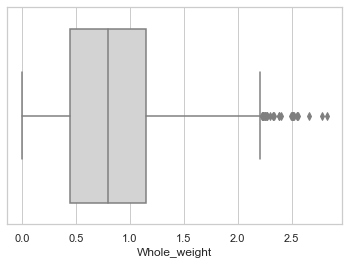

In [34]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Whole_weight, color="lightgrey")

In [35]:
#Op bovenstaand boxplot zien we de gegevens van 'Whole_weight'. We zien dat de mediaan op ongeveer 0.80g staat. Het minimum is 
#0.00g en er zijn geen enkele uitschieters die onder dit minimum zitten. Het maximum dat we zien is ongeveer 2.20g, we zien 
#redelijk wat uitschieters die boven het maximum zitten. De uitschieter die het meest weegt, weegt 2.82g, dus 0.62g meer dan 
#het maximum dat we zien. 

In [36]:
#Analyse 'Shucked_weight':
df.Shucked_weight.describe()

count    4177.000000
mean        0.359367
std         0.221963
min         0.001000
25%         0.186000
50%         0.336000
75%         0.502000
max         1.488000
Name: Shucked_weight, dtype: float64

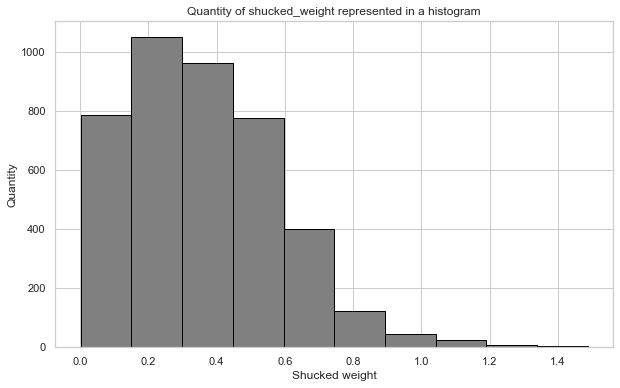

In [37]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Shucked_weight, color='grey', edgecolor='black')

axes.set_title("Quantity of shucked_weight represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Shucked weight")
plt.show()

In [38]:
#Het histogram hierboven toont ons de gegevens van 'Shucked_weight'. We zien dat de tweede staaf de hoogste is en we zien een 
#constante daling na deze staaf. Het grootste deel van de zeeoren bevindt zich hier tussen de eerste vier staven, dus 
#tussen de 0.00g en de 0.60g. 

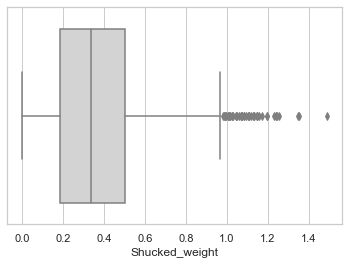

In [39]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Shucked_weight, color="lightgrey")

In [40]:
#In het boxplot dat hierboven staat zien we de gegevens van 'Shucked_weight'. We zien dat de mediaan staat op 0.35g. 
#Het minimum staat op 0.00g met geen enkele uitschieter die hieronder zit. Het maximum staat op ongeveer 0.98g, we zien
#heel wat uitschieters die hierboven zitten. 

In [41]:
#Analyse 'Viscera_weight': 
df.Viscera_weight.describe()

count    4177.000000
mean        0.180594
std         0.109614
min         0.000500
25%         0.093500
50%         0.171000
75%         0.253000
max         0.760000
Name: Viscera_weight, dtype: float64

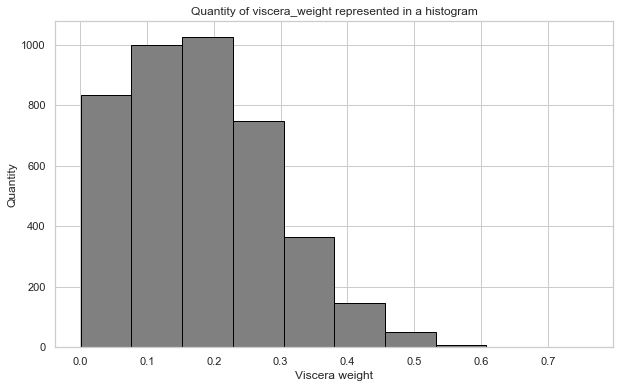

In [42]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Viscera_weight, color='grey', edgecolor='black')

axes.set_title("Quantity of viscera_weight represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Viscera weight")
plt.show()

In [43]:
#Het histogram hierboven gaat over 'Viscera_weight'. We zien weer dat de eerste vier staven de meeste zeeoren bevatten. De
#hoogste staaf die wij zien is de derde, rond de 0.20g. We merken ook op dat alle staven hierna constant blijven minderen. We 
#kunnen besluiten dat de grootste groep zeeoren zich tussen de 0.00g en de 0.30g bevind. 

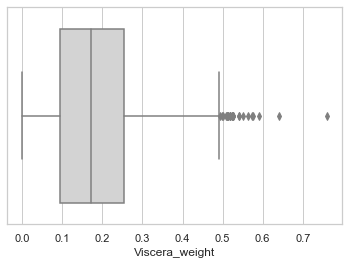

In [44]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Viscera_weight, color="lightgrey")

In [45]:
#In het boxplot hierboven zien we de gegevens van 'Viscera_weight'. We zien dat de mediaan staat op 0.18g. Het minimum dat we 
#zien is 0.00g met geen enkele uitschieters die hieronder zitten. Het maximum dat we zien is wat lager dan 0.50g, we zien weer 
#redelijk wat uitschieters die hierboven zitten. 

In [46]:
#Analyse 'Shell_weight': 
df.Shell_weight.describe()

count    4177.000000
mean        0.238831
std         0.139203
min         0.001500
25%         0.130000
50%         0.234000
75%         0.329000
max         1.005000
Name: Shell_weight, dtype: float64

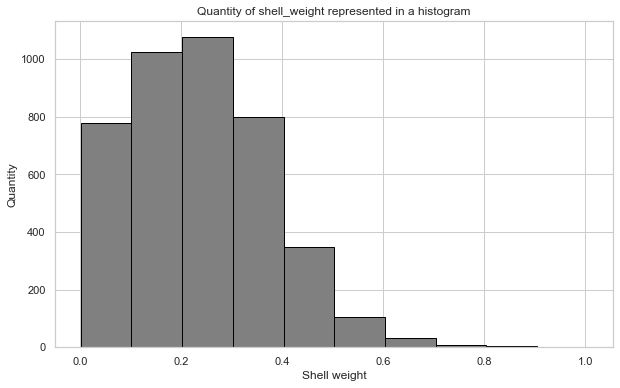

In [47]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Shell_weight, color='grey', edgecolor='black')

axes.set_title("Quantity of shell_weight represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Shell weight")
plt.show()

In [48]:
#Bovenstaand histogram toont ons de gegevens van 'Shell_weight'. We zien weeral dat de eerste vier staven de meeste zeeoren
#bevatten. We zien dat de derde staaf (de staaf tussen 0.20g en 0.30g) het hoogste is. Na de derde staaf zien we weer een 
#constante daling tot 0.90g. We kunnen besluiten dat de grootste groep zeeoren zich bevindt tussen de 0.00g en de 0.40g. 

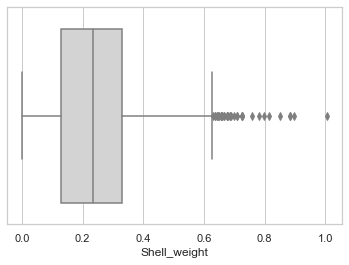

In [49]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Shell_weight, color="lightgrey")

In [50]:
#Bovenstaand boxplot gaat over 'Shell_weight', we zien dat het mediaan staat op ongeveer 0.22g. Het minimum staat op 0.00g, 
#er zijn geen uitschieters die hieronder zitten. Het maximum staat op 0.62g, we zien wel redelijk wat uitschieters die hier 
#boven zitten. We zien ook duidelijk dat het grootste deel zich links van de mediaan bevind. 

In [51]:
#Analyse 'Class_number_of_rings': 
df.Class_number_of_rings.describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Class_number_of_rings, dtype: float64

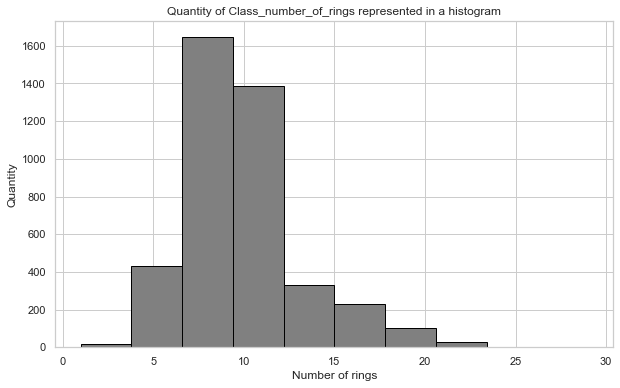

In [52]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(111)
axes.hist(df.Class_number_of_rings, color='grey', edgecolor='black')

axes.set_title("Quantity of Class_number_of_rings represented in a histogram")
axes.set_ylabel("Quantity")
axes.set_xlabel("Number of rings")
plt.show()

In [53]:
#Bovenstaand histogram gaat over het aantal ringen dat de zeeoren hebben. We zien dat er twee staven zijn die veel hoger staan 
#dan de rest. Dit zijn de zeeoren die tussen de 6 en de 12 ringen hebben. Het aantal ringen toont ook hoe oud de zeeoren zijn, 
#dus we kunnen besluiten dat de grootste groep zeeoren tussen de 6 en de 12 jaar zitten. We zien ook dat er in verhouding veel 
#minder zeeoren zijn die ouder dan 12 jaar zijn. Na de hoogste staaf zien we weer een constante daling.

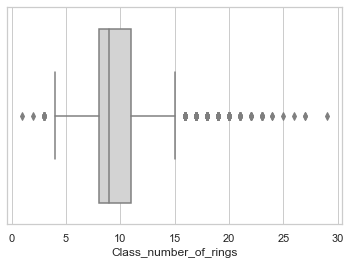

In [54]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.Class_number_of_rings, color="lightgrey")

In [55]:
#In het boxplot hierboven zien we weer meer informatie over het aantal ringen van de zeeoren. We zien dat de mediaan staat op 
#9 ringen. Het minimum staat op 4 ringen, met enkele uitschieters die hieronder zitten. Het maximum staat op 15, met redelijk
#wat uitschieters, zelfs eentje die bijna aan de 30 ringen zit, dat is bijna dubbel zoveel dan het maximum. We merken ook dat 
#het grootste deel van de zeeoren zich rechts van de mediaan bevind. 

In [56]:
#Dat was de individuele analyse per kollom. Nu gaan we een analyse doen over hoe de kollomen zich verhouden ten opzichte 
#van elkaar. Dit gaan we doen met behulp van 'Scatter plots'. We gaan niet alle kollomen opnieuw behandelen, we gaan 
#ons in dit deel focussen op hoe de verschillende kollomen zich verhouden tegenover het gewicht en de leeftijd. Als gewicht
#nemen we in elke grafiek 'whole_weight' (omdat ik dit het meest logische vond om te nemen) en voor de leeftijd nemen we het 
#aantal ringen, dus de laatste kollom. 

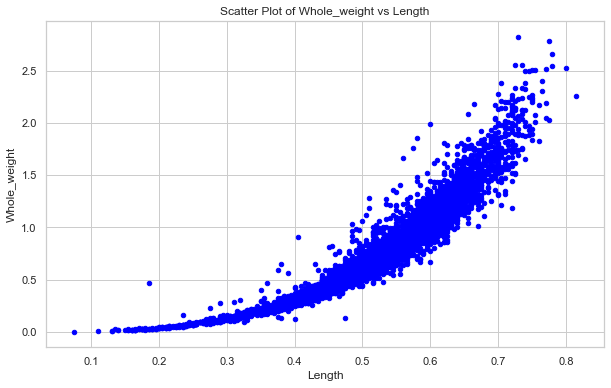

In [57]:
df.plot.scatter("Length", "Whole_weight", figsize=(10, 6), title="Scatter Plot of Whole_weight vs Length", color="Blue")
plt.show()

In [58]:
#In het bovenstaande Scatter plot zien we de lengte in verhouding met het hele gewicht van de zeeoren. De grafiek geeft ons 
#een heel goed beeld over waar de grootste groep van zeeoren zich bevind. We kunnen zeggen dat het grootste deel af te lezen
#staat tussen de 0.50mm en de 0.70mm (op de horizontale-as) en tussen de 0.50g en 2.00g (op de verticale-as). We kunnen het 
#verloop vergelijken met het verloop van een exponentiële functie, 'Hoe groter de lengte, hoe groter het gewicht van de
#zeeoren'. 

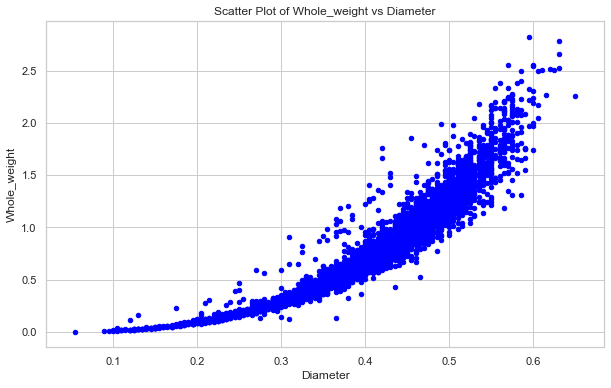

In [59]:
df.plot.scatter("Diameter", "Whole_weight", figsize=(10, 6), title="Scatter Plot of Whole_weight vs Diameter", color="Blue")
plt.show()

In [60]:
#Op de bovenstaande grafiek zien we de verhouding van het hele gewicht met de diameter van de zeeoren. We zien dat het 
#grootste deel zich bevindt tussen de 0.40mm en de 0.60mm (op de horizontale-as) en tussen de 0.50g en de 2.00g (op de
#verticale-as). Hier zien we net zoals bij de vorige grafiek het verloop van een exponentiële functie. Dus 'Hoe groter de
#diameter, hoe groter het gewicht'. We merken ook dat deze grafiek fel op de vorige lijkt, dit komt doordat de gegevens van 
#lengte en diameter kort op elkaar zitten (dit werd eerder bij de individuele analyse ook al gezegd).

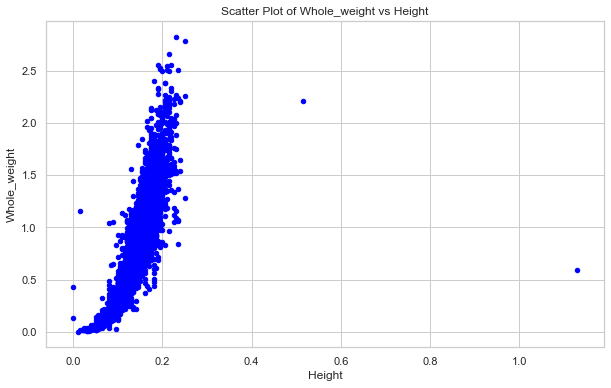

In [61]:
df.plot.scatter("Height", "Whole_weight", figsize=(10, 6), title="Scatter Plot of Whole_weight vs Height", color="Blue")
plt.show()

In [62]:
#Op deze grafiek zien we de verhouding van het gewicht met de hoogte. We zien dat het grootste deel van de zeeoren zich bevindt
#tussen de 0.00mm en de 0.20mm (op de horizontale-as) en tussen 0.50g en 1.50g (op de verticale-as). We merken ook op dat de 
#correlatie in deze grafiek veel minder is dan op de twee vorige Scatter plots. Het verloop dat we hier hebben lijkt niet direct
#op de vorige twee grafieken, hier zien we eerst een stijging die bij 0.00 begint op beide assen. En daarna zien we dat het op 
#de verticale as blijft stijgen terwijl de waarden op de horizontale-as redelijk stabiel blijven. De hoogte blijft stabiel op 
#0.20mm terwijl het gewicht blijft doorstijgen tot 2.50g. 

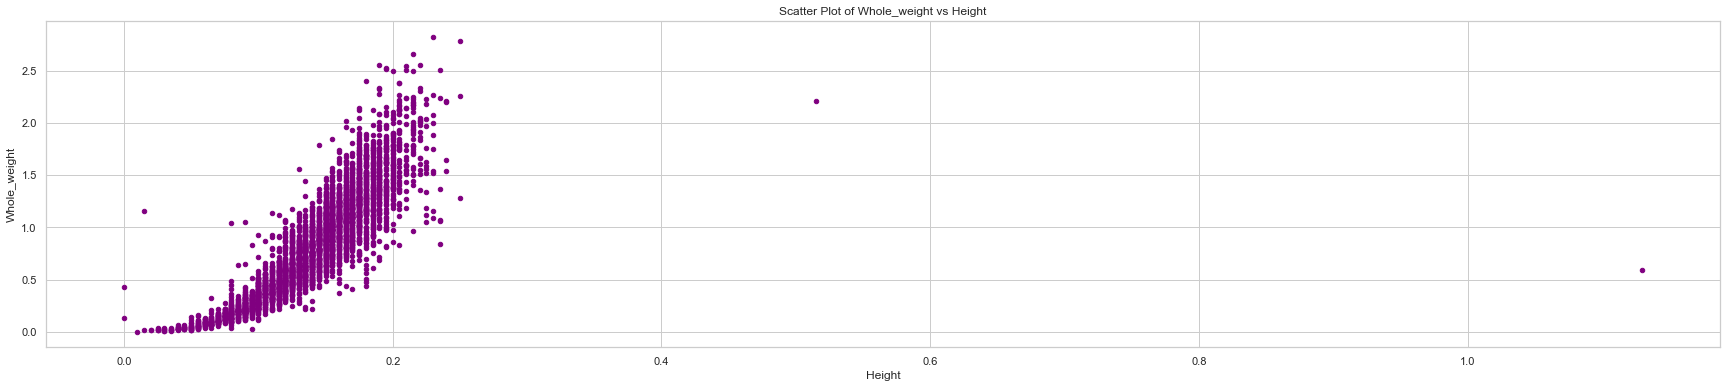

In [63]:
df.plot.scatter("Height", "Whole_weight", figsize=(30, 6), title="Scatter Plot of Whole_weight vs Height", color="Purple")
plt.show()

In [64]:
#De bovenstaande grafiek is exact dezelfde als de vorige grafiek over de hoogte en het gewicht. Alleen is de schaal deze keer 
#veranderd. De rede waarom ik hier de schaal heb veranderd is omdat er wel degelijk een verhoging is aan beide kanten, dit zien
#we zeker bij de individuele grafieken. De reden waarom we de stijging van 'Height' niet zo duidelijk zagen op de vorige grafiek
#is puur omdat bijna alle data tussen de 0.00 en 0.20mm zit. Als we de grafiek langer maken dan zien we ook dat er sprake is
#van een exponentiëel verloop net zoals bij de vorige grafieken. Dus 'Hoe groter de hoogte, hoe groter het gewicht'. 

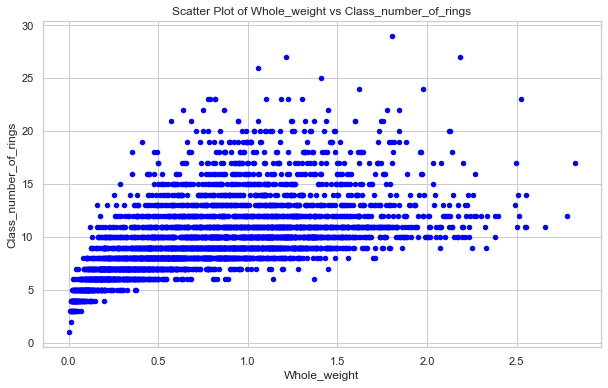

In [65]:
df.plot.scatter("Whole_weight", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Whole_weight vs Class_number_of_rings", color="Blue")
plt.show()

In [66]:
#In bovenstaande grafiek zien we het verband tussen het aantal ringen en het gewicht van de zeeoren. Hier zien we dat het 
#grootste deel van de zeeoren zich bevindt tussen de 0.50g en de 1.50g op de horizontale-as en tussen de 5 en 15 ringen op de 
#verticale-as. Deze grafiek laat ons zien dat er bij dezelfde leeftijd veel verschillende gewichten te vinden zijn. Want we zien
#duidelijk dat de leeftijd (aantal ringen) na een tijdje redelijk stabiel blijft lopen (als we naar de grote groep kijken). 

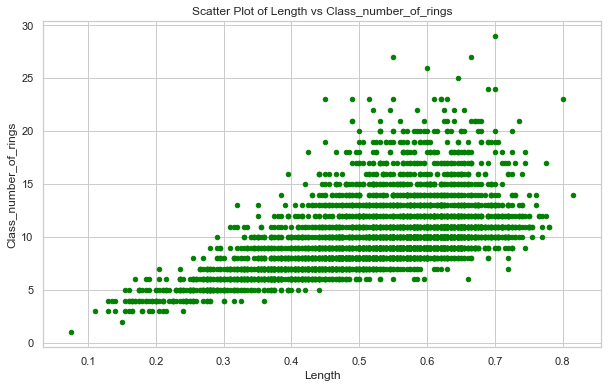

In [67]:
df.plot.scatter("Length", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Length vs Class_number_of_rings", color="Green")
plt.show()

In [68]:
#Op de bovenstaande grafiek zien we het verband tussen de lengte en de leeftijd. We zien heel duidelijk dat 'De leeftijd stijgt,
#wanneer de lengte stijgt'. We zien ook dat de groep klein begint aan de linkerkant en dat het veel groter wordt aan de
#rechterkant van de grafiek. Het grootste deel is te zien tussen de 0.40mm en de 0.70mm (op de horizontale-as) en tussen de
#5 en de 15 ringen op de (verticale-as).

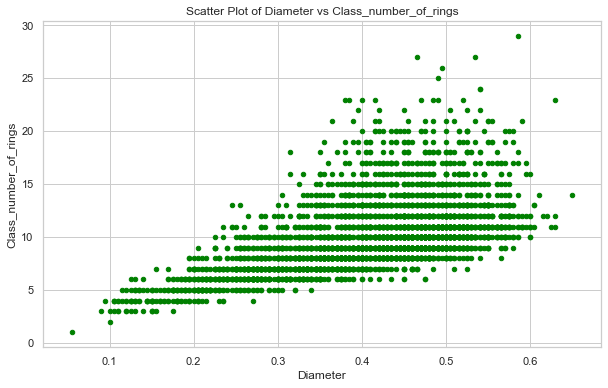

In [69]:
df.plot.scatter("Diameter", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Diameter vs Class_number_of_rings", color="Green")
plt.show()

In [70]:
#Op deze grafiek zien we de verhouding tussen de diameter en de leeftijd. We zien hier ook een verband dat stijgt dus: 
#'Hoe groter de diameter, hoe meer ringen de zeeoren hebben'. De grootste groep situeert zicht tussen de 0.30mm en de
#0.50mm op de horizontale-as en tussen de 5 en 15 ringen op de verticale-as. 

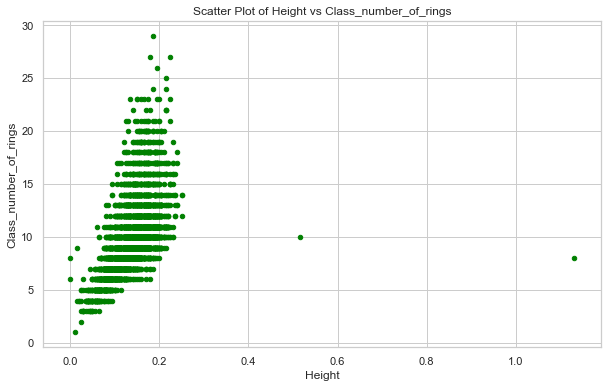

In [71]:
df.plot.scatter("Height", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Height vs Class_number_of_rings", color="Green")
plt.show()

In [72]:
#Dit is de grafiek van de hoogte ten opzichte van de leeftijd. We zien hier weer net zoals bij de eerdere grafiek van 'Height'
#dat de grafiek stabiel blijft bij 0.20mm, aan de verticale-as zien we de grafiek wel stijgen tot ongeveer 25 ringen. We zien
#dat de grootste groep zit tussen de 0.00mm en de 0.20mm op de horizontale-as. En de 5 en 20 ringen op de verticale-as. 

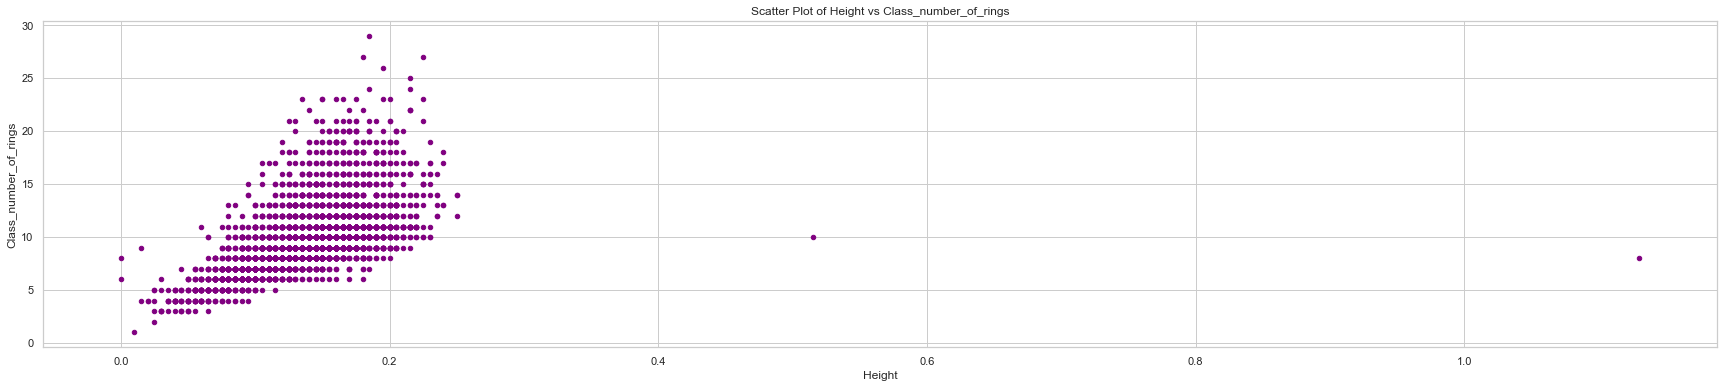

In [73]:
df.plot.scatter("Height", "Class_number_of_rings", figsize=(30, 6), title="Scatter Plot of Height vs Class_number_of_rings", color="Purple")
plt.show()

In [74]:
#Net zoals bij de eerdere analyse heb ik deze grafiek ook langer gemaakt. Dit is exact dezelfde grafiek als hierboven. 
#We zien hier duidelijk dat de grafiek niet stabiel blijft maar echt wel door blijft stijgen. Dit was niet zo goed zichtbaar 
#op de vorige grafiek omdat bijna alle data zit tussen de 0.00mm en de 0.20mm. We kunnen hier ook zeggen: 'Hoe groter de
#hoogte is, hoe meer ringen de zeeoren hebben'. 

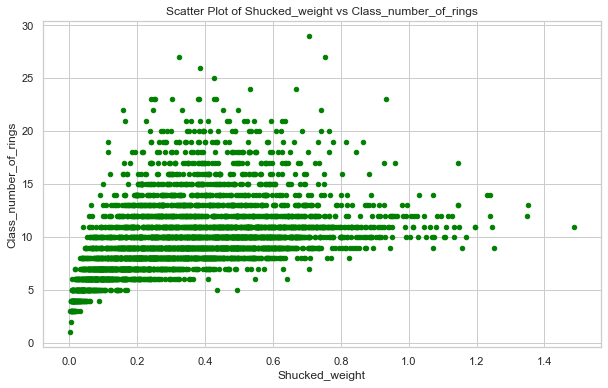

In [75]:
df.plot.scatter("Shucked_weight", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Shucked_weight vs Class_number_of_rings", color="Green")
plt.show()

In [76]:
#Op bovenstaande grafiek zien we het verband tussen 'Shucked_weight' en de leeftijd. We zien hier dat er eerst een felle
#stijging is die daarna stabieler wordt. Het grootste deel van de zeeoren situeert zich hier tussen de 0.00g en de 0.60g op de 
#horizontale-as en tussen de 5 en 15 ringen op de verticale-as. 

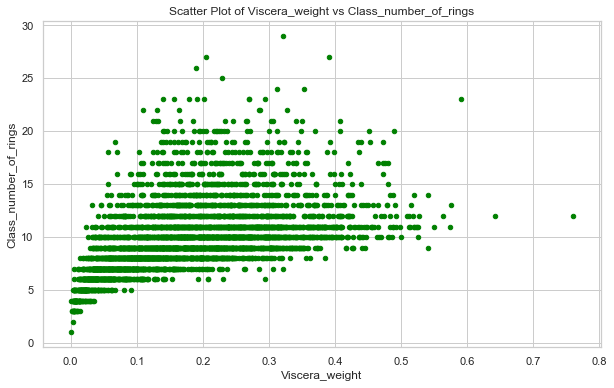

In [77]:
df.plot.scatter("Viscera_weight", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Viscera_weight vs Class_number_of_rings", color="Green")
plt.show()

In [78]:
#De grafiek die we hierboven zien gaat over het 'Viscera_weight' met de leeftijd. We zien weer net zoals bij de grafiek
#hierboven dat we eerst een stijging hebben met daarna een stabieler verloop. De grootste groep zit hier tussen de 0.00g en de 
#0.30g op de horizontale-as en tussen de 5 en 15 ringen op de verticale-as. We merken ook dat deze grafiek heel fel op de
#vorige grafiek lijkt, dit komt omdat het weer gaat over het gewicht, alleen is het dit keer ook zonder de vloeistoffen in het
#lichaam, daarom ook dat de waarden op de horizontale-as veel lager liggen dan bij de vorige grafiek. 

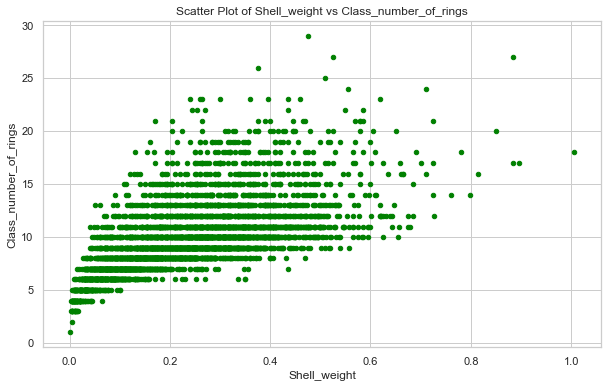

In [79]:
df.plot.scatter("Shell_weight", "Class_number_of_rings", figsize=(10, 6), title="Scatter Plot of Shell_weight vs Class_number_of_rings", color="Green")
plt.show()

In [80]:
#Deze grafiek toont ons het verband tussen de schelp en de leeftijd van de zeeoren. We zien eerst een stijging die stabiel 
#wordt. De grootste groep situeert zich hier tussen de 0.00g en de 0.40g op de horizontale-as en tussen de 5 en 15 ringen 
#op de verticale-as. 

In [81]:
#Dat waren de analyses tussen de verschillende kollomen van mijn dataset. In dit volgende deel ga ik ook gebruik maken
#van een heatmap om een goed beeld te krijgen van het verband tussen de kollomen. 

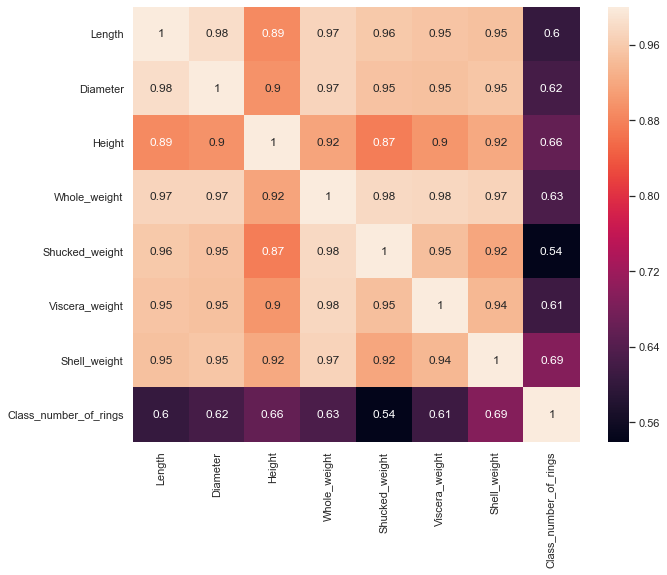

In [82]:
plt.subplots(figsize=(10, 8))
corr = df.corr('spearman')
_ = sns.heatmap(corr, annot=True)

#Deze onderstaande code zorgt ervoor dat deze datarepresentatie veel beter voorgesteld word. 
#Doordat er een bug is wordt er een stuk van de grafiek (bodem en top) weggeknipt. Dit maakt het niet zo aangenaam om het af
#te lezen. Deze code maakt de data goed leesbaar. De onderstaande code is overgenomen van een forum op internet.
#----------------------------------------------------------
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
#----------------------------------------------------------

In [83]:
#Op deze heatmap kunnen we de sterkte zien tussen de verschillende kollomen. Het nummer dat we zien toont ons de sterkte van de
#relatie tussen de twee kollomen (dit nummer kan niet 1 zijn, 1 wil zeggen dat de grafieken 100% overeen komen, dit zien we
#alleen als we twee keer dezelfde kollom nemen). 

#Dus als voorbeeld zullen we de oorspronkelijke reden nemen van deze dataset, de bedoeling was om de eigenschappen te
#onderzoeken die de sterkste link hadden met de leeftijd. Op de grafiek zien we dat dit 'Heigt' en 'Shell_weight' zijn. We zien 
#'Height' dat het cijfer op 0.66 staat en bij 'Shell_weight' op 0.69. Op de twee onderstaande grafieken zien we deze verbanden. 

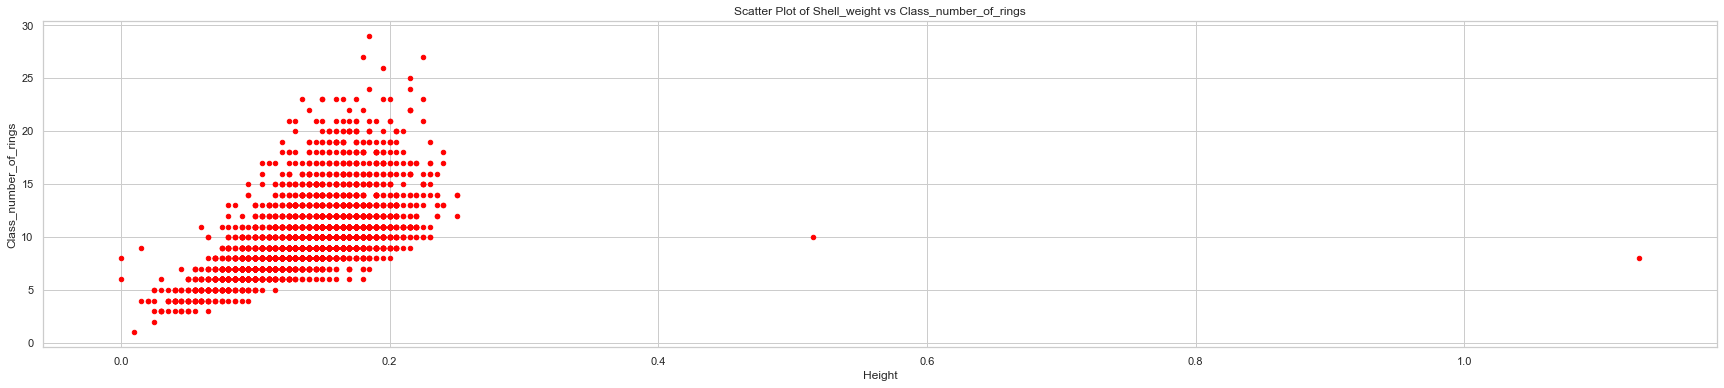

In [84]:
df.plot.scatter("Height", "Class_number_of_rings", figsize=(30, 6), title="Scatter Plot of Shell_weight vs Class_number_of_rings", color="Red")
plt.show()

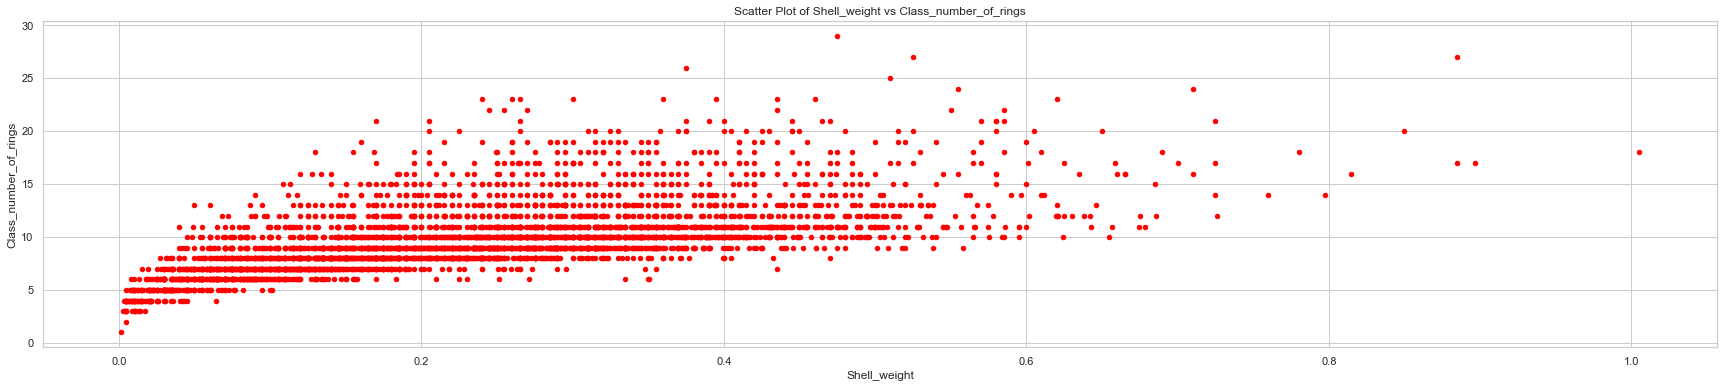

In [85]:
df.plot.scatter("Shell_weight", "Class_number_of_rings", figsize=(30, 6), title="Scatter Plot of Shell_weight vs Class_number_of_rings", color="Red")
plt.show()

In [ ]:
#Dat was deel 2 van mijn opgave. Alles wat hier nu onder staat hoort bij deel 3 van de opgave, dus bij het deel van
#Machine Learning. Hier ga ik eerst classificatie toepassen en daarna ook clustering. Zoals ik helemaal in het begin ook 
#heb gezegd ga ik hier het geslacht van de zeeoren proberen te voorspellen met behulp van hun kenmerken. 

In [169]:
import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

In [124]:
x = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight',
        'Shell_weight', 'Class_number_of_rings']] 

y = df['Sex']

In [125]:
#We kennen alle eigenschappen die we gaan gebruiken toe aan de variabele x, dit zijn er 8 in totaal. En het geslacht kennen
#we toe aan de variabele y, omdat we deze willen voorspellen ('Sex' is ons target). 

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [133]:
logisticReg = LogisticRegression(solver='liblinear', fit_intercept=True)

In [134]:
model = tree.DecisionTreeClassifier(random_state=0)

In [135]:
model = model.fit(x_train, y_train)

In [139]:
classifier = BernoulliNB().fit(x_train, y_train)
clf = LinearSVC().fit(x_train, y_train)
logistic_reg = logisticReg.fit(x_train, y_train)

C:\Users\Hursit Tarcan\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Hursit Tarcan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#In bovenstaande code zien we onze classifiers die we gaan gebruiken. 

In [141]:
y_pred = model.predict(x_test)
y_predict_naive = classifier.predict(x_test)
y_pred_lsvm = clf.predict(x_test)
y_pred_log = logistic_reg.predict(x_test)

In [ ]:
#Hier zetten we alle voorspelde waarden in een nieuwe variabele. Dit doen we omdat we niet willen dat we de echte testwaarden
#overschrijven. 

In [147]:
print(y_pred)
print(y_predict_naive)
print(y_pred_lsvm)
print(y_pred_log)

['M' 'I' 'M' ... 'M' 'M' 'I']
['M' 'M' 'M' ... 'M' 'M' 'M']
['F' 'F' 'F' ... 'I' 'F' 'I']
['F' 'M' 'F' ... 'I' 'F' 'I']


In [149]:
#Omdat het gaat over heel veel data gaan we de accuracy score gebruiken. 

In [159]:
print('Accuracy score of Decision Tree:', metrics.accuracy_score(y_test, y_pred))
print('Accuracy score of Naive Bayes:', metrics.accuracy_score(y_test, y_predict_naive))
print('Accuracy score of Linear Support Vector Machine:', metrics.accuracy_score(y_test, y_pred_lsvm))
print('Accuracy score of Logistic Regression:', metrics.accuracy_score(y_test, y_pred_log))

Accuracy score of Decision Tree: 0.49521531100478466
Accuracy score of Naive Bayes: 0.3652312599681021
Accuracy score of Linear Support Vector Machine: 0.5550239234449761
Accuracy score of Logistic Regression: 0.5685805422647527


In [ ]:
#We merken op dat Logistic Regression de beste score heeft gevolgd door LSVM en daarna Decision Tree. We zien dat Naive Bayes
#de laagste score heeft. Dat was het deel van classificatie nu ga ik naar het deel van clustering. 

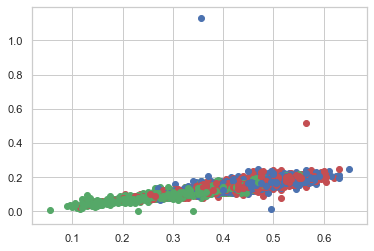

In [167]:
colors = {'M':'r', 'I':'g', 'F':'b'}
fig, ax = plt.subplots()
for i in range(len(df['Diameter'])): 
    ax.scatter(df['Diameter'][i], df['Height'][i], color=colors[df['Sex'][i]])

In [ ]:
#In bovenstaande grafiek zien we het verband tussen de geslachten en twee kenmerken die ik heb gekozen. 
#De groene kleur stelt de 'Infants' voor. De rode kleur stelt de mannelijke zeeoren voor, en de blauwe kleur
#stelt de vrouwen voor. Op de horizontale-as zien we de 'Diameter' staan en op de verticale-as zien we de 'Height' staan. 

In [170]:
kmeans = KMeans(3)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Wat we hier doen is het volgende: we trainen onze machine om onze gegevens in drie groepen in te delen. Dit zorgt ervoor dat 
#elke zeeoor in een van de drie categoriën wordt geplaats. Ins ons geval zijn deze groepen 'M', 'I' en 'F', als we nog een 
#andere groep zouden hebben bijvoorbeeld een extra groep 'K' (fictief) dan moesten we bij KMeans tussen de haakjes 4 zetten.

In [171]:
NN = x_train
NN['predict'] = kmeans.fit_predict(NN)

C:\Users\Hursit Tarcan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


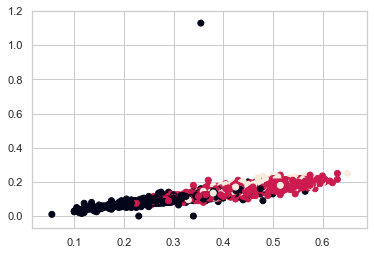

In [172]:
plt.scatter(NN['Diameter'], NN['Height'], c=NN['predict'])

In [ ]:
#Hier zien we dan het voorspelde resultaat wanneer we de gegevens in drie groepen zetten. We zien dat de grafiek lijkt op de
#grafiek die we eerder hebben gezien. 